In [ ]:
!pip install torch
!pip install transformers
!pip install BeautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.4 MB/s eta 0:00:00


In [29]:
import re
import requests
from bs4 import BeautifulSoup
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import sentencepiece
from nltk.corpus import indian
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
model_name = "csebuetnlp/mT5_multilingual_XLSum"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [ ]:
def fetch_hindi_text(url):
    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')
    content_div = soup.find(id="mw-content-text")
    hindi_text = content_div.text.strip()

    return hindi_text

def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Remove newline characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.strip()

def filter_text(text, max_length=512):
    if len(text) > max_length:
        return text[:max_length]
    else:
        return text


In [45]:
text = '''8 जुलाई 2022 की सुबह जापान के समयानुसार लगभग 11:30 बजे नारा शहर में अपने पार्टी एलडीपी के उम्मीदवार के लिए चुनाव प्रचार कर रहे शिजों आबे की उनके ही देश के एक पूर्व सैनिक ने गोली मारकर हत्या कर दी।[22][23]

हत्यारे ने आबे के पीछे से अपने घर में बने बंदूक से दो शॉट फायर किए। पहला शॉट कहीं और लगा, जिसके बाद आबे पलटते हैं, और उसी दौरान उसने दूसरा शॉट फायर किया, जो आबे के गले और छाती के पास लगता है। इसके बाद उन्हें दिल का दौरा आता है। उन्हें जल्द ही नारा मेडिकल यूनिवर्सिटी हॉस्पिटल में हैलीकॉप्टर के द्वारा ले जाया जाता है, लेकिन अस्पताल आने से पहले ही आबे द्वारा कोई प्रतिक्रिया नहीं दिखाई पड़ती है। उनका रक्त पहले ही इतना बह चुका था कि रक्त चढ़ाने के बावजूद भी उन्हें बचाया नहीं जा सका और जापानी समयानुसार 17:03 को उन्हें मृत घोषित कर दिया गया। वे तब 67 साल के थे।

41 वर्षीय तेत्सुया यामागामी, जापान का पूर्व सैनिक है, जो 2002 से 2005 तक तीन साल सैनिक के रूप में काम किया था। उसे गोली मारने के तुरंत बाद ही स्थानीय पुलिस द्वारा पकड़ लिया जाता है।

यामागामी के अनुसार उसने आबे को मारा क्योंकि "उसकी माँ यूनिफिकेशन चर्च नामक ईसाई धार्मिक संगठन से जुड़ी हुई थी, जिसने उसका ब्रेनवाश किया और उससे पैसे लेने लगे। उन लोगों को पैसे देने के चक्कर में माँ ने घर तक बेच दिया और दिवालिया हो गई। इस कारण वो यूनिफिकेशन चर्च के प्रमुख, हाक जा हान को ढूंढ रहा था, लेकिन उस तक पहुँच नहीं पाने के कारण उसने अपना टार्गेट बदल कर आबे को निशाना बनाया, क्योंकि उसके अनुसार आबे ने ही जापान में इस धर्म का प्रचार किया था। आबे और उसके परिवार के यूनिफिकेशन चर्च के साथ काफी घनिष्ठ रिश्ते हैं। आबे ने अपने दादा किशी नोबुसूके के रहते समय भी धर्म के समर्थन में स्पीच दिया था। निक्कन गेंदई अखबार के अनुसार आबे के चौथे केबिनेट के 20 सदस्यों में से 10 सदस्य यूनिफिकेशन चर्च से जुड़े हुए हैं। यामागामी ने कहा कि उसे आबे के राजनीतिक नीतियों या कार्यों से कोई समस्या नहीं थी
'''

# WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))
device = torch.device('cuda:0')
model = model.to(device)
input_ids = tokenizer(
    [(text)],
    return_tensors="pt",
    padding="max_length",
    truncation=True,
    max_length=4096
)["input_ids"].to(device)

output_ids = model.generate(
    input_ids=input_ids,
    max_length=512,
    no_repeat_ngram_size=4,
    num_beams=5
)[0].to(device)

summary = tokenizer.decode(
    output_ids,
    skip_special_tokens=True,
    clean_up_tokenization_spaces=False
)

print(summary)



जापान में ईसाई धर्म के समर्थन में प्रचार कर रहे शिजों को गोली मारकर हत्या कर दी गई है।


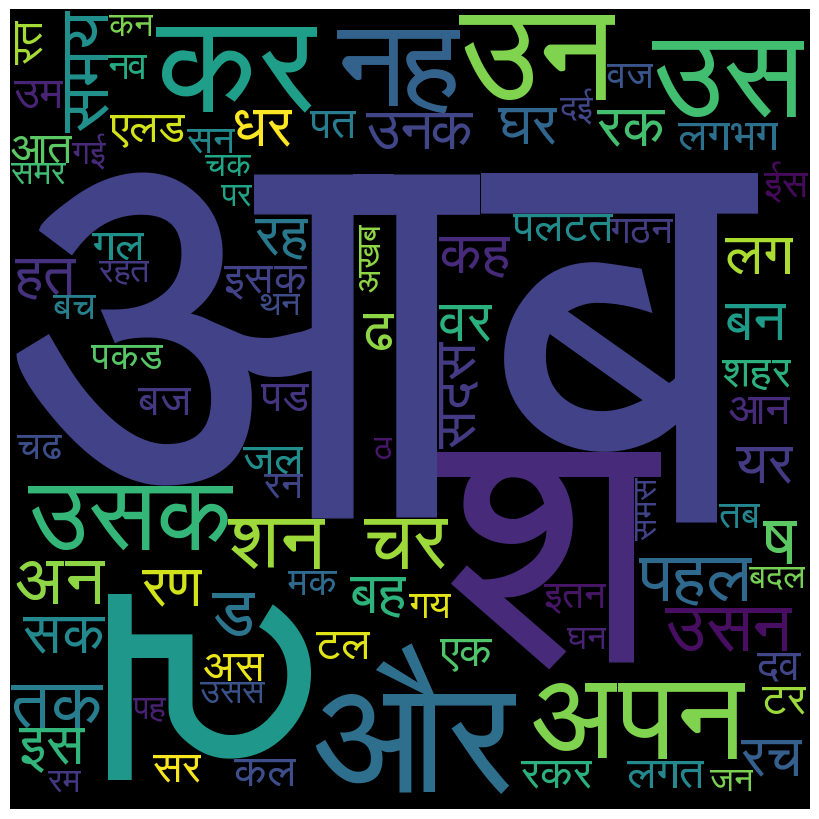

In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import re

stopword=''' 
अत
अपना
अपनी
अपने
अभी
अंदर
आदि
आप
इत्यादि
इन 
इनका
इन्हीं
इन्हें
इन्हों
इस
इसका
इसकी
इसके
इसमें
इसी
इसे
उन
उनका
उनकी
उनके
उनको
उन्हीं
उन्हें
उन्हों
उस
उसके
उसी
उसे
एक
एवं
एस
ऐसे
और
कई
कर
करता
करते
करना
करने
करें
कहते
कहा
का
काफ़ी
कि
कितना
किन्हें
किन्हों
किया
किर
किस
किसी
किसे
की
कुछ
कुल
के
को
कोई
कौन
कौनसा
गया
घर
जब
जहाँ
जा
जितना
जिन
जिन्हें
जिन्हों
जिस
जिसे
जीधर
जैसा
जैसे
जो
तक
तब
तरह
तिन
तिन्हें
तिन्हों
तिस
तिसे
तो
था
थी
थे
दबारा
दिया
दुसरा
दूसरे
दो
द्वारा
न
नके
नहीं
ना
निहायत
नीचे
ने
पर
पहले
पूरा
पे
फिर
बनी
बही
बहुत
बाद
बाला
बिलकुल
भी
भीतर
मगर
मानो
मे
में
यदि
यह
यहाँ
यही
या
यिह
ये
रखें
रहा
रहे
ऱ्वासा
लिए
लिये
लेकिन
व
वग़ैरह
वर्ग
वह
वहाँ
वहीं
वाले
वुह
वे
सकता
सकते
सबसे
सभी
साथ
साबुत
साभ
सारा
से
सो
संग
ही
हुआ
हुई \n
हुए
है
हैं
हो
होता
होती
होते
होना
होने
'''
stop_words=[]

# pre-process stopword
for i in stopword:
  i = re.sub('[\n]', '' , i)
  # print(i)
  stop_words.append(i)

stopwords = set(stop_words)

wordcloud = WordCloud(font_path='gargi.ttf',width = 800, height = 800,
background_color ='black',
stopwords = stopwords,
min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# from collections import Counter
# df_list=[]

# for ele in text:
#   df_list.append(ele)

# dictionary=Counter(df_list)
# font='gargi.ttf'
# wordcloud = WordCloud(width = 1000, height = 700,
#                 background_color ='white',
#                 min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# # plot the WordCloud image                      
# plt.figure(figsize = (18, 8), facecolor = None)
# plt.imshow(wordcloud,interpolation="bilinear")
# plt.axis("off")
# plt.tight_layout(pad = 0)
# plt.show()